# EXAMPLE 11

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/var/folders/8q/jpyhxf1968g491b93p_py9v40000gn/T/ipykernel_52293/3275577614.py:35: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Quantization of $x(t) = 4.5 \sin(2\pi)')
/var/folders/8q/jpyhxf1968g491b93p_py9v40000gn/T/ipykernel_52293/3275577614.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


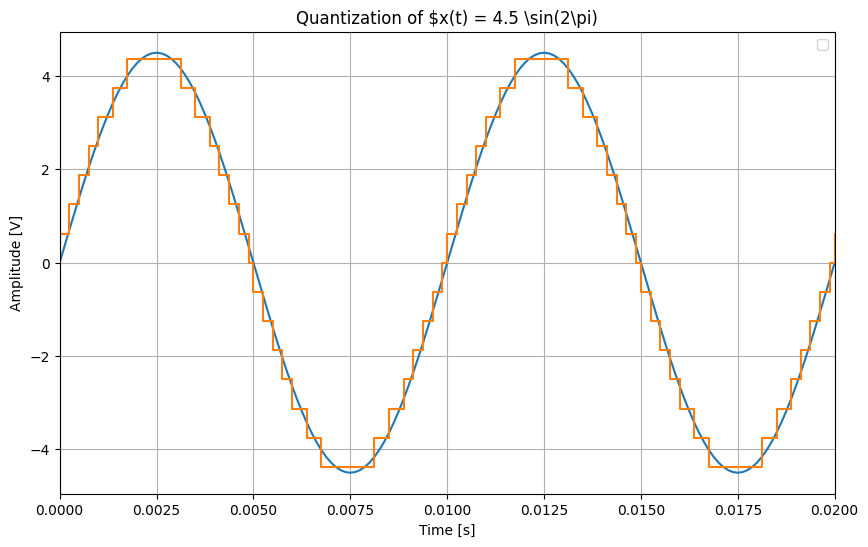

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 4.5
f = 100
Fs = 8000
t = np.arange(0, 0.05, 1 / Fs)

x_t = A * np.sin(2 * np.pi * f * t)

n_bits = 4
V_max = 5
V_min = -5
quantixation_levels = 2 ** n_bits

delta = (V_max - V_min) / (quantixation_levels)

x_q = np.round((x_t - V_min) / delta) * delta + V_min

x_q = np.clip(x_q, V_min, V_max)

quantixation_noise = x_t - x_q

signal_power = np.mean(x_t ** 2)

noise_power = np.mean(quantixation_noise ** 2)

SNR = 10 * np.log10(signal_power / noise_power)

plt.figure(figsize = (10, 6))
plt.plot(t, x_t)
plt.step(t, x_q)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.title('Quantization of $x(t) = 4.5 \sin(2\pi)')
plt.xlim([0, 0.02])
plt.legend()
plt.grid(True)
plt.show()